In [1]:
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pickle

if __name__ == "__main__":
    file_path = 'C:\\Users\\Onke Gwala\\datasets\\dailydeli.csv'  
    date_col = 'date'  # Replace with the actual date column name
    target_col = 'meantemp'  # Replace with the actual target column name
    order = (5, 1, 5) 


In [2]:
def load_and_preprocess_data(file_path, date_col, target_col):
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Convert to datetime and set as index
    df[date_col] = pd.to_datetime(df[date_col])
    df.set_index(date_col, inplace=True)

    df = df.asfreq('D')

    # Differencing to make data stationary if necessary
    result = adfuller(df[target_col])
    if result[1] > 0.05:  
        df[target_col] = df[target_col].diff().dropna()

    return df



In [3]:
def build_and_fit_arima_model(dataframe, target_col, order):
    # Build and fit the ARIMA model
    model = ARIMA(dataframe[target_col], order=order)
    model_fit = model.fit()

    return model_fit


In [4]:
def save_model_as_pickle(model, filename):
    with open(filename, 'wb') as pkl:
        pickle.dump(model, pkl)


In [5]:
df = load_and_preprocess_data(file_path, date_col, target_col)
model_fit = build_and_fit_arima_model(df, target_col, order)
save_model_as_pickle(model_fit, 'arima_model.pkl')


C:\Users\Onke Gwala\python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Onke Gwala\python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Onke Gwala\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


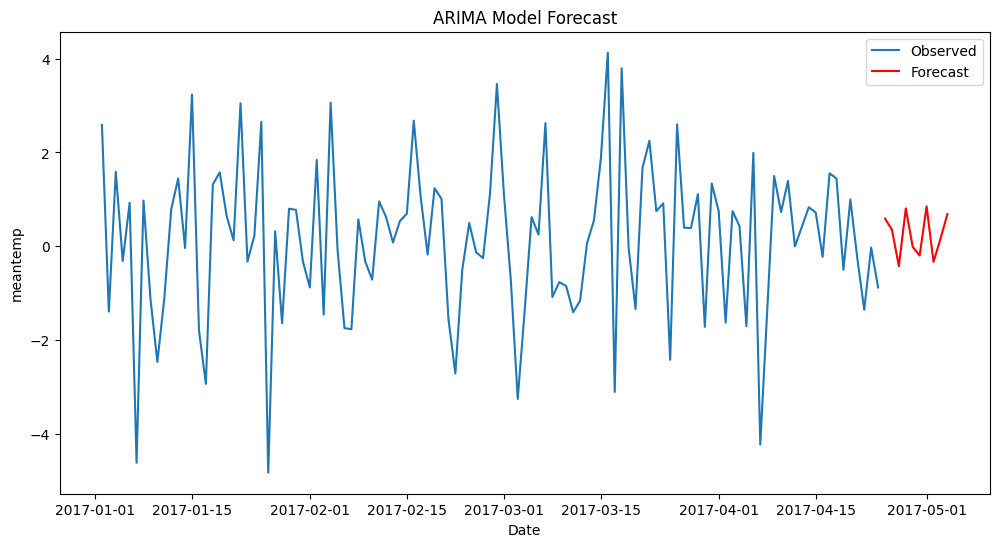

In [6]:
import matplotlib.pyplot as plt

forecast_periods = 10
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_index = pd.date_range(df.index[-1], periods=forecast_periods + 1)
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df[target_col], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel(target_col)
plt.legend()
plt.show()

